# Week 2 - Polynomial Curve Fitting and Cross Validation

Learning contents:

1. Linear models
    - Linear function
    - Error function
    - Root meant square error
    - Optimization of Error function
    - Test the model
2. Regularization
    - Error function
    - Optimization
    - Test with regularization
3. Model Selection
    - Cross-validation
4. Bayesian curve fitting
    - Display results

## Description

In this exercise we will apply Linear Models for Polynomial Curve Fitting task.

You have to fill empty functions (with pass in body) to match their purpose.

1. You have to create a code for evaluation of a Linear Model, it's error functions and finding optimal weights with given error functions.
2. You need to add regularization to the optimization procedure.
3. You need to implement Cross-validation model selection technique.
4. You need to implement Bayesian curve fitting, computing phi and S matricies at first, then using them to compute mean and variance.

## Dependencies

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import  exp

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [131]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

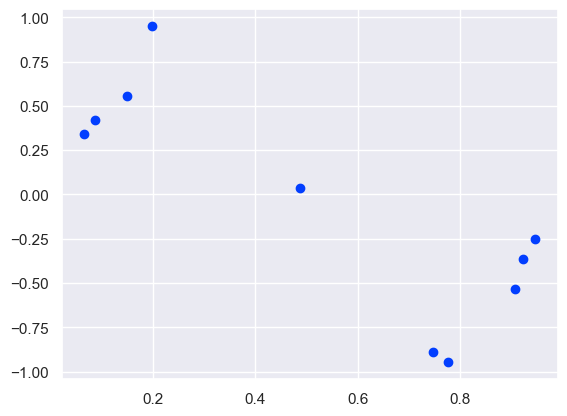

In [132]:
plt.scatter(x_train, y_train)

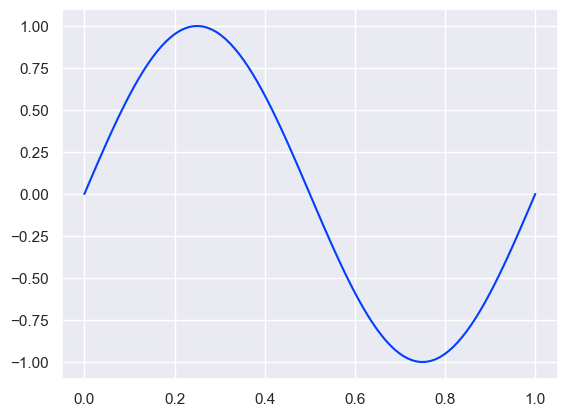

In [133]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

### 1.1) Linear function

Complete the function below, named `linear`, which takes two parameters: a single data point `x` and a list of `M` number of `weights`. The function should return an output value `y` as given in the equation on slide 6 of Lecture 3. In essence, this function should implement a polynomial of order `M`.   

In [134]:
def linear(x, weights):
    total = 0
    for i, w in enumerate(weights):   
        if i == 0:
            total += w
        else:
            total += w * x ** i
    return total


### 1.2) Error function

Complete the function below, named `err`, that computes the sum-of-squared error between the output of the function above and the corresponding target value. Specifically, the function should implement the error equation in slide 7 of Lecture 3. The function takes `weights`, `inputs` and `targets` as parameters

In [135]:
def err(weights, inputs, targets):
    total = 0
    for idx, x in enumerate(inputs):
        total += (linear(x, weights) - targets[idx]) ** 2
    return total / 2

### 1.3) Root meant square error

Write a function for computing the root mean squared error as given in the equation in slide 12 of Lecture 3

In [136]:
def erms(weights, inputs, targets):
    return np.sqrt(2 * err(weights, inputs, targets) / len(inputs))

### 1.4) Optimization of Error function

Create a function below that obtains `optimial_weights` by implementing the optimization solution given in slide 9 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, and `M` (number of weights) as parameters and returns optimal weights for the given set of training data.

In [137]:
def optimial_weights(inputs, targets, M):
    mat = np.vander(inputs, N=M+1, increasing=True)
    w = np.linalg.solve(mat.T @ mat, mat.T @ targets)
    return w
    

### 1.5) Test the model

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figure.

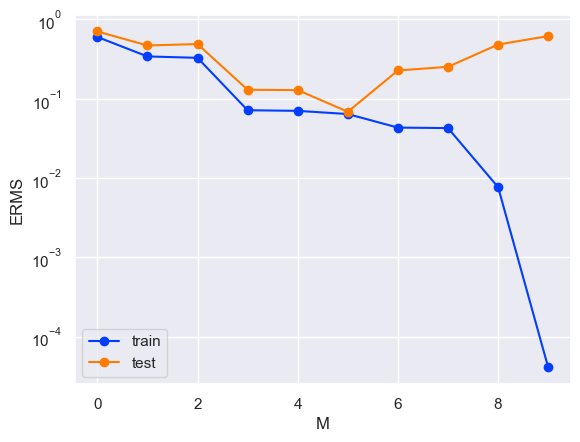

In [138]:
def test_all(start_M, end_M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for M in range(start_M, end_M + 1):
        weights = optimial_weights(x_train, y_train, M)
        all_weights.append(weights)
        error_train = erms(weights, x_train, y_train)
        error_test = erms(weights, x_test, y_test)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

r_tr, r_tt, all_weights = test_all(0, 9, x_train, y_train, x_test, y_test)

plt.plot(list(range(0, 10)), r_tr, '-o', label='train')
plt.plot(list(range(0, 10)), r_tt, '-o', label='test')
plt.xlabel('M')
plt.ylabel('ERMS')
plt.legend()
plt.yscale('log')

##### Weights table for different `M`

The following code lists the optimal weight vectors obtained for different model order `M` values. Explain what happens to the weights at large values of `M`.

In [139]:
print(pd.DataFrame(all_weights))

          0           1            2             3             4  \
0 -0.067444         NaN          NaN           NaN           NaN   
1  0.674906   -1.403250          NaN           NaN           NaN   
2  0.870601   -2.937208     1.521622           NaN           NaN   
3 -0.348533   11.654727   -33.094539     22.088529           NaN   
4 -0.274931   10.447965   -27.877273     14.161034      3.897826   
5  0.052313    2.957062    24.077616   -126.364847    164.358999   
6  1.343704  -29.263446   282.780632  -1019.109580   1661.058638   
7  1.660030  -39.466913   401.665336  -1667.823571   3460.274324   
8 -2.482014  104.675722 -1466.784009  10138.647152 -36821.924549   
9 -1.505560   61.629761  -721.533079   3546.700729  -4078.742670   

              5             6              7             8             9  
0           NaN           NaN            NaN           NaN           NaN  
1           NaN           NaN            NaN           NaN           NaN  
2           NaN           

##### Estimated curve for `M=9` (same as the amount of data points) 

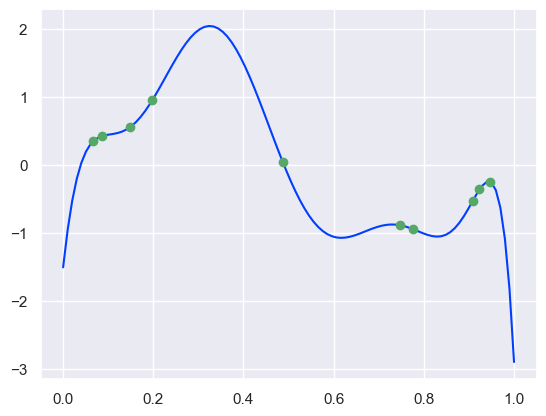

In [140]:
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights(x_train, y_train, 9)), x_test)), '-')
plt.plot(x_train, y_train, 'og')

## 2) Regularization

### 2.1) Error function

Implement the cost function `err_regularization` that takes into account the regularization term, as given in the equation on slide 16 of Lecture 3. The function should take `weights`, `inputs`, `targets` and `l` (lambda regularization term) as input parameters and compute sum-of-squared error with weight regularization.

In [141]:
def err_regularization(weights, inputs, targets, l):
    return err(weights, inputs, targets) + (l / 2) * np.sum(weights ** 2)

Write the `erms_regularization` function which is regularization version of a root mean squared error (slide 12 in lecture 3)

In [142]:
def erms_regularization(weights, inputs, targets, l):
    return np.sqrt(2 * err_regularization(weights, inputs, targets, l) / len(inputs))

### 2.2) Optimization

Create a function below that obtains `optimial_weights` by implementing the optimization solution of the regularized problem as given in slide 16 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, `M` (number of weights) and `l` (regularization term) as parameters and returns optimal weights for the given set of training data.

In [143]:
def optimial_weights_regularization(inputs, targets, M, l):
    mat = np.vander(inputs, N=M+1, increasing=True)
    w = np.linalg.solve(l*np.identity(M+1) + mat.T @ mat, mat.T @ targets)
    return w

### 2.3) Test with regularization

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figures.

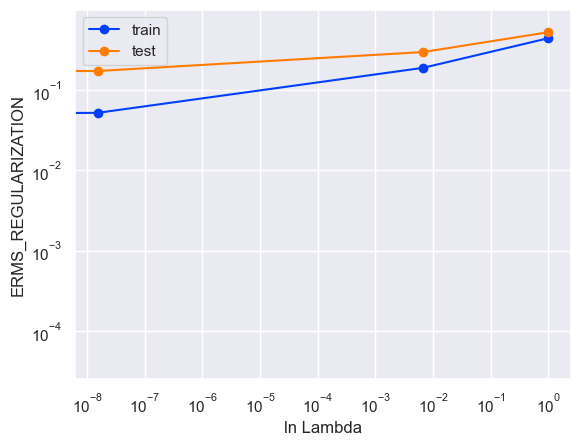

In [144]:
def test_all_regularization(ls, M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for l in ls:
        weights = optimial_weights_regularization(x_train, y_train, M, l)
        all_weights.append(weights)
        error_train = erms_regularization(weights, x_train, y_train, l)
        error_test = erms_regularization(weights, x_test, y_test, l)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

ls = [0, exp(-18), exp(-5), exp(0)]

r_tr_r, r_tt_r, all_weights_r = test_all_regularization(ls, 9, x_train, y_train, x_test, y_test)

plt.plot(ls, r_tr_r, '-o', label='train')
plt.plot(ls, r_tt_r, '-o', label='test')
plt.xlabel('ln Lambda')
plt.ylabel('ERMS_REGULARIZATION')
plt.legend()
plt.yscale('log')
plt.xscale('log')

##### Weights for `M=9` with regularization terms `0`, `exp(-18)`, `exp(-5)`, `exp(0)`

In [145]:
print(pd.DataFrame(np.transpose(all_weights_r)))

               0           1         2         3
0      -1.505560    0.699011  0.503543  0.328543
1      61.629761  -11.795682  0.743539 -0.389393
2    -721.533079  121.043844 -2.425527 -0.353466
3    3546.700729 -335.150177 -1.908122 -0.232935
4   -4078.742670  217.987061 -0.795824 -0.127092
5  -20914.384528  178.622534  0.106829 -0.046211
6   80597.894316  -87.722824  0.719266  0.013218
7 -116513.688694 -148.839187  1.096707  0.055948
8   78677.139104  -12.387887  1.302133  0.085993
9  -20656.404402   78.207422  1.385740  0.106489


In [146]:
def plot_by_lambda(l):
    plt.plot(x_test, y_test, '-m')
    plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, 9, l)), x_test)), '-')
    plt.plot(x_train, y_train, 'og')

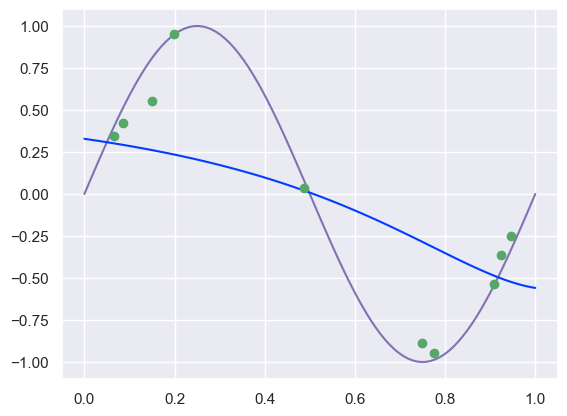

In [147]:
plot_by_lambda(exp(0))

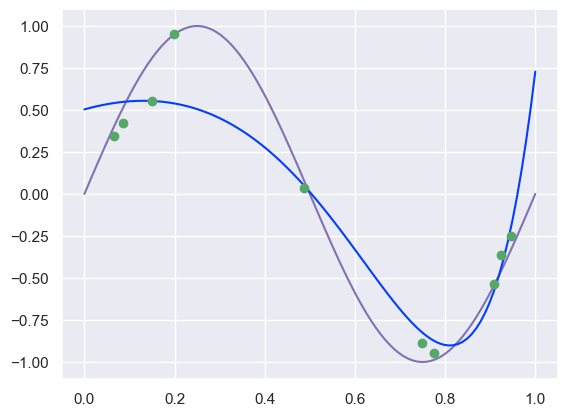

In [148]:
plot_by_lambda(exp(-5))

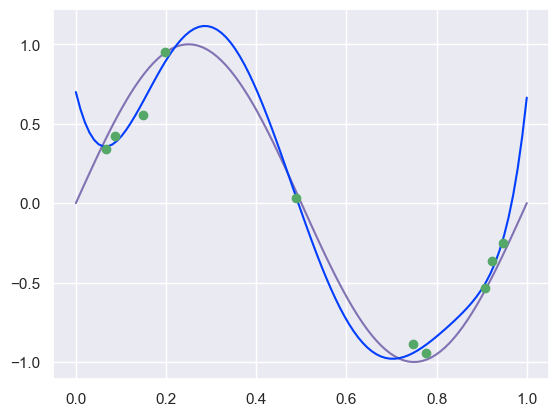

In [149]:
plot_by_lambda(exp(-18))

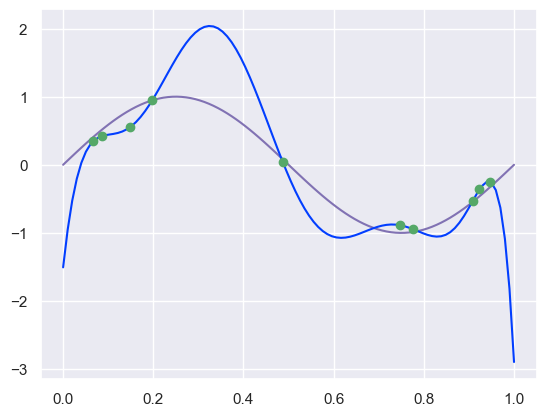

In [150]:
plot_by_lambda(0)

## 3) Model Selection

### 3.1) Cross-validation

Write a function called 'create_cross_validation_sets' that:

Takes as input:

S: the number of folds (sets) for cross-validation,

x_train, y_train: the training data points.

Returns a Python list of length S. Each element of this list must itself be a list or tuple of the form:

[x_sub_train, y_sub_train, x_validation, y_validation]

where:

x_validation, y_validation is one fold of the training data.

x_sub_train, y_sub_train is the remaining training data (the other S-1 folds).

Together, all validation folds should cover the entire training set without overlap.

Name the returned list as 'sets'.

Hint: Refer to the figure in slide 20 of Lecture 3 to see how cross-validation folds are constructed.

In [151]:
def create_cross_validation_sets(S, x_train, y_train):

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    n = len(x_train)
    indices = np.arange(n)

    fold_sizes = [n // S] * S
    for i in range(n % S):      
        fold_sizes[i] += 1

    sets = []
    start = 0
    for fold_size in fold_sizes:
        end = start + fold_size
        val_idx = indices[start:end]
        train_idx = np.concatenate([indices[:start], indices[end:]])

        x_sub_train = x_train[train_idx]
        y_sub_train = y_train[train_idx]
        x_validation = x_train[val_idx]
        y_validation = y_train[val_idx]

        sets.append([x_sub_train, y_sub_train, x_validation, y_validation])
        start = end

    return sets


Implement the function 'best_model' that searches for the best polynomial model order and regularization parameter using S-fold cross-validation.

The function should loop over all integers M between start_M and end_M (inclusive).

For each M, also loop over all values of ls (a list of candidate regularization parameters).

For each combination (M, λ), perform S-fold cross-validation (as described in the lecture):

1. Split the training data into S folds using 'create_cross_validation_sets'.

For each fold:

2. Fit the model with order M and regularization λ on the sub-train data.

3. Compute the ERMS (without regularization term) on the validation fold.

4. Average the validation ERMS across all S folds.

5. Keep track of the (M, λ) pair that achieves the lowest mean validation ERMS.

The function must return: (best_M, best_lambda, best_mean_val_erms)

M = 3 lambda = 0 CV ERMS = 0.08175332959164248


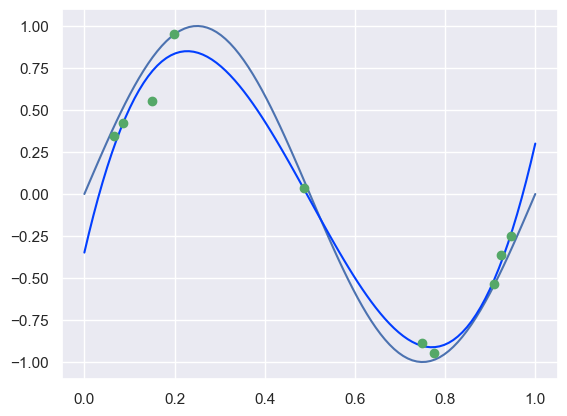

In [152]:
def best_model(start_M, end_M, ls, sets):
    best_mean_val_erms = float('inf')
    best_M = None
    best_lambda = None
    
    for M in range(start_M, end_M + 1):
        for lam in ls:
            fold_erms = []
            for x_sub_train, y_sub_train, x_val, y_val in sets:
                
                weights = optimial_weights_regularization(x_sub_train, y_sub_train, M, lam)
                
                y_pred = linear(x_val, weights)
                
                fold_erms.append(erms(weights, x_val, y_val))
            
            mean_val_erms = np.mean(fold_erms)
            
            if mean_val_erms < best_mean_val_erms:
                best_mean_val_erms = mean_val_erms
                best_M = M
                best_lambda = lam
    
    return best_M, best_lambda, best_mean_val_erms

# Use the ORIGINAL training set to build CV folds
sets = create_cross_validation_sets(10, x_train, y_train)

M, l, r = best_model(0, 9, [0, exp(-18), exp(-5), exp(0)], sets)
print('M =', M, 'lambda =', l, 'CV ERMS =', r)

# Retrain on full training set with the chosen hyperparams, then plot/predict
plt.plot(x_test, y_test, '-b')
plt.plot(x_test, [linear(x, optimial_weights_regularization(x_train, y_train, M, l)) for x in x_test], '-')
plt.plot(x_train, y_train, 'og')

## 4) Bayesian curve fitting (Optional)

This exercise is optional. It requires an understanding of section 1.2.6 of the textbook which is given as a reading assignment after lecture 3. The function below `phi` takes `x` (data point) and `M` (number of weights) as arguments and returns a vector of powers of `x` from `0` to `M`

In [153]:
def phi(x, M):
    return np.vstack([x**i for i in range(M + 1)]).T


`S` takes `alpha`, `beta`, `x` (all data points), and `M` as arguments and returns a matrix `S` that is used to compute `mean` and `variance`

In [154]:
def S(alpha, beta, x, M):
    Phi = phi(x, M)
    return np.linalg.inv(alpha * np.identity(M + 1) + beta * Phi.T @ Phi)

`mean` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian distribution

In [155]:
def mean(alpha, beta, x_star, x, t, M):
    Phi = phi(x, M)                   
    S_mat = S(alpha, beta, x, M)       
    return beta * phi(x_star, M).ravel() @ S_mat @ (Phi.T @ t)


`variance` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes variance for the Gaussian variance

In [156]:
def variance(alpha, beta, x_star, x, M):
    S_mat = S(alpha, beta, x, M)
    return 1 / beta + phi(x_star, M).ravel() @ S_mat @ phi(x_star, M).ravel()


### 4.1) Display results

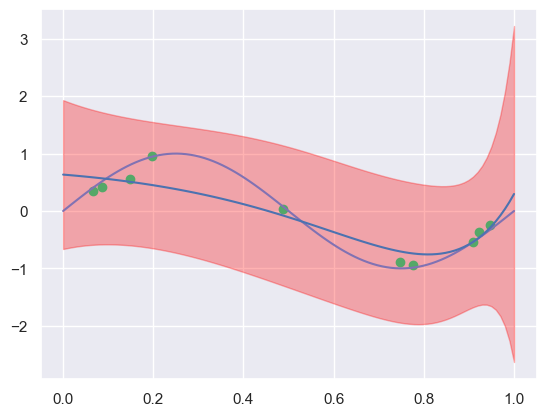

In [157]:
alpha = 0.05
beta = 1.1
M = 9

means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, M), x_test)))

plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha=0.3)